# Домашнее задание №2 часть 2

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
import nltk.compat
from nltk.corpus import stopwords
from wordcloud import WordCloud
import numpy as np
from PIL import Image

In [2]:
ana_list = []
key_list = [] # список словарных ключей
with open('igrok_parse.json', encoding='utf-8') as f:
    text = f.read()
    lines = text.splitlines()

for line in lines:
    data = json.loads(line)
    ana_list.append(data)

# немного преобразую данные, чтобы получилась нормальная таблица
for ana in ana_list:
    str_tags = ana['tag'][0]
    tags = ana['tag'][1]

    ana.pop('tag')
    ana.update(tags)
    ana.update({'all tags' : str_tags})
    for key in ana.keys():
        key_list.append(key)

## 1. Dataframe

In [3]:
df = pd.DataFrame(ana_list)

С помощью списка ключей измаенила порядок колонок, чтобы "лемма" и "все теги" были в начале, а "словоформа" в конце

In [4]:
key_set = set((key_list))
list_of_colls = list(key_set)

list_of_colls.remove('lemma')
list_of_colls.remove('all tags')
list_of_colls.remove('text')
list_of_colls.insert(0, 'all tags')
list_of_colls.insert(0, 'lemma')
list_of_colls.extend(['text'])

df = df[list_of_colls]

In [5]:
# убрала колонку с вероятностью
del df ['prob']
# заменила "NaN" на прочерк
df = df.fillna('-')

In [6]:
df

,lemma,all tags,mood,case,tense,number,POS,involvement,gender,animacy,aspect,voice,transitivity,person,text
0,annotation,LATN,-,-,-,-,-,-,-,-,-,-,-,-,annotation
1,роман,"NOUN,anim,masc,Name sing,nomn",-,nomn,-,sing,NOUN,-,masc,anim,-,-,-,-,роман
2,из,PREP,-,-,-,-,PREP,-,-,-,-,-,-,-,из
3,записка,"NOUN,inan,femn plur,gent",-,gent,-,plur,NOUN,-,femn,inan,-,-,-,-,записок
4,молодой,"ADJF,Qual neut,sing,gent",-,gent,-,sing,ADJF,-,neut,-,-,-,-,-,молодого
5,человек,"NOUN,anim,masc sing,gent",-,gent,-,sing,NOUN,-,masc,anim,-,-,-,-,человека
6,достоевский,"NOUN,anim,masc,Sgtm,Surn sing,nomn",-,nomn,-,sing,NOUN,-,masc,anim,-,-,-,-,достоевский
7,фёдор,"NOUN,anim,masc,Name sing,nomn",-,nomn,-,sing,NOUN,-,masc,anim,-,-,-,-,фёдор
8,михайло,"NOUN,anim,masc,Patr sing,nomn",-,nomn,-,sing,NOUN,-,masc,anim,-,-,-,-,михайлович
9,игрок,"NOUN,anim,masc sing,nomn",-,nomn,-,sing,NOUN,-,masc,anim,-,-,-,-,игрок


## 2. Графики с семинара

### "Gender" pie chart

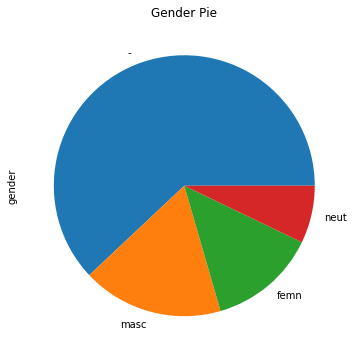

In [7]:
plt.figure(figsize=(6, 6))
df['gender'].value_counts().plot(kind='pie');
plt.title('Gender Pie');

### "POS frequency" bar plot

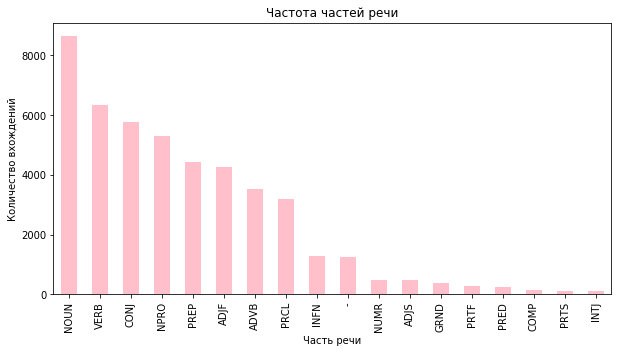

In [8]:
plt.figure(figsize=(10, 5))
df ['POS'].value_counts().plot.bar(color='pink');
plt.xlabel('Часть речи')
plt.title('Частота частей речи')
plt.ylabel('Количество вхождений');

### "N of lemma entries by POS" Box plot

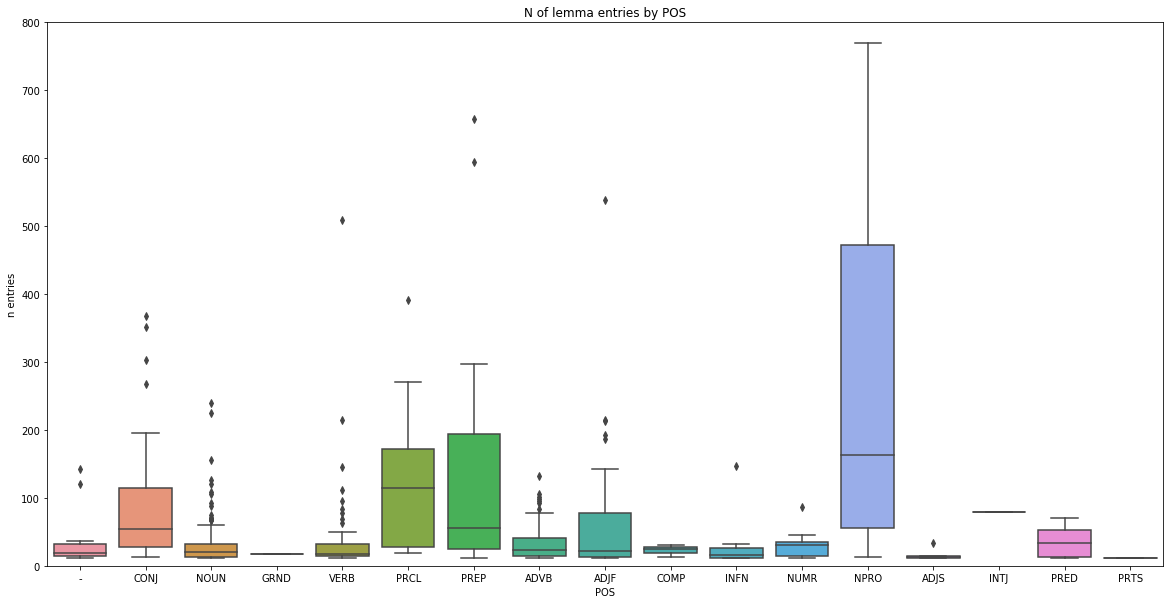

In [9]:
df2 = df[['lemma', 'POS', 'gender']].groupby(['lemma', 'POS'], as_index=False).count()
df2.columns = ['lemma', 'POS', 'total']
df2 = df2[df2['total'] > 10]
plt.figure(figsize=(20, 10))
sns.boxplot(x="POS", y="total", data=df2)
plt.ylim((0, 800))
plt.title('N of lemma entries by POS')
plt.ylabel('n entries')
plt.xlabel('POS');

## 3. Мои графики

### Word cloud глаголов 

In [10]:
# делаю список лемм глаголов
pg = df.groupby('POS')
df_verbs = pg.get_group('VERB')
verb_lemmas = []
for lemma in df_verbs ['lemma']:
    verb_lemmas.append(lemma)

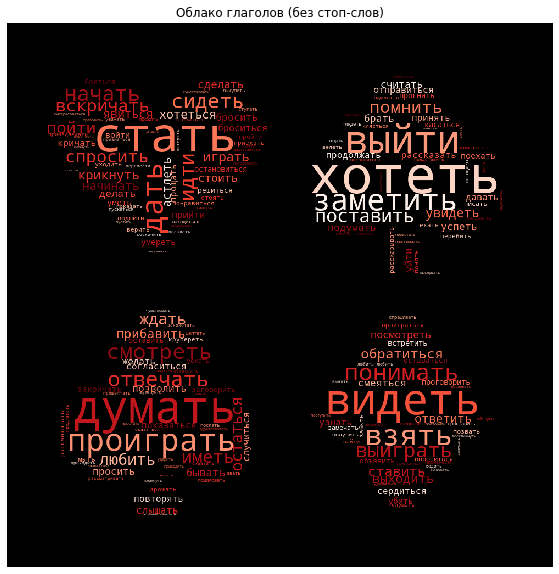

In [11]:
# стоп слова + некоторые частотные, но не интересные глаголы
stops = set(stopwords.words('russian') + ['сказать', 'говорить', 'мочь', 'знать'])

text = ' '.join([word for word in verb_lemmas if word not in stops])
mask = np.array(Image.open('mask.jpg'))

wordcloud = WordCloud(
    background_color = 'black',
    width = 800, 
    height = 800, 
    mask = mask, 
    colormap = 'Reds'
).generate(text)

plt.figure(figsize = (10, 10), facecolor = 'none')
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Облако глаголов (без стоп-слов)')
plt.show()

#### Я посчитала формат вордклауд самым подходящим, так как он наглядно показывает какие глаголы наиболее частотны и позволяет также сравнить их между собой.
А ещё это выглядит красиво...

### Линейные графики частотности слов "выиграть" и "проиграть"

#### Лемматизированный текст, разделенный на равные части

In [12]:
lemmas = []
for lemma in df ['lemma']:
    lemmas.append(lemma)

chunks = []
for i in range(0, len(lemmas), 2000):
        chunks.append(lemmas[i:i+2000])

#### Вычисляю частотность

In [13]:
def ipm(chunks, my_word):

    list_of_freqs = []
    count = 0

    for chunk in chunks:
        for word in chunk:
            if word == my_word:
                count += 1

        freq = count/len(chunk)
        count = 0

        list_of_freqs.append(freq)

    return list_of_freqs

#### Строю графики

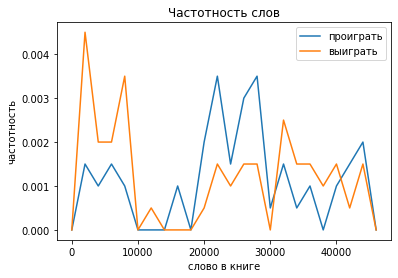

In [14]:
X = [i*2000 for i in range(len(chunks))]
Y = ipm(chunks, 'проиграть')
X2 = [i*2000 for i in range(len(chunks))]
Y2 = ipm(chunks, 'выиграть')
plt.plot(X, Y, label = 'проиграть')
plt.plot(X2, Y2, label = 'выиграть')
plt.title('Частотность слов')
plt.ylabel('частотность')
plt.xlabel('слово в книге')
plt.legend(loc='best')
plt.show()

#### На мой взгляд такой способ визуализации позволяет наглядно показать соотношение частотности этих  двух слов на протяжении всей книги.

### Круговая диаграмма языка слов

Text(0.5, 1.0, 'Доля русских и не русских слов')

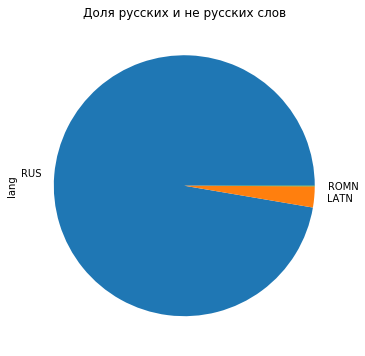

In [15]:
df3 = df ['all tags']
lang_list = []

for tags in df3:
    if tags == 'LATN':
        # слова латинскими буквами
        lang_list.append(tags)
    elif tags == 'ROMN':
        # римские цифры
        lang_list.append(tags)
    else:
        lang_list.append('RUS')

plt.figure(figsize=(6, 6))
pd.DataFrame(lang_list, columns =['lang'])['lang'].value_counts().plot(kind='pie');
plt.title('Доля русских и не русских слов')

#### Pie chart - удобный способ визуализировать доли

## 4. NLTK Lexical Dispersion Plot

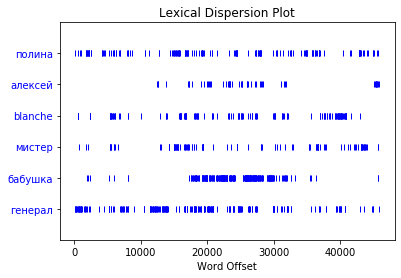

In [16]:
lemmas = []
for ana in ana_list:
    lemmas.append(ana['lemma'])

nltk.draw.dispersion_plot(lemmas,['полина', 'алексей', 'blanche', 'мистер', 'бабушка','генерал'])

mademoiselle Blanche - как просто blanche, мистер Астлей как просто мистер, так как для "Астлей" в разных формах определялись разные леммы ("астлея", "астлеть").